In [3]:
import random
import math
import matplotlib.pyplot as plt
import time

In [4]:
# ==================== Function to Integrate ====================
def g(x):
    """
    The test function: (sum(xi))^2
    """
    return sum(x)**2

In [5]:
# ==================== Grid Method ====================
def grid_integration(g, a, b, d, n):
    """
    Approximates the d-dimensional integral of function g from a to b using the grid method.

    Args:
        g: The multidimensional function to integrate.
        a: The lower limit of integration.
        b: The upper limit of integration.
        d: The dimensionality of the integral.
        n: The number of points along each dimension.

    Returns:
        The approximate integral value.
    """
    start_time = time.time()

    h = (b - a) / n  # Step size along each dimension
    total_points = n ** d

    integral_sum = 0
    
    # Generate all grid points and evaluate the function
    def generate_points(current_dim, current_point):
      nonlocal integral_sum
      if current_dim == d:
        integral_sum += g(current_point)
        return
      
      for i in range(n):
        new_point = current_point + [a + i * h + h / 2]
        generate_points(current_dim + 1, new_point)

    generate_points(0, [])

    #Calculate the approximate integral
    integral = (h ** d) * integral_sum

    end_time = time.time()
    execution_time = end_time - start_time

    return integral, execution_time

In [6]:
# ==================== Monte Carlo Method ====================
def monte_carlo_integration(g, a, b, d, n, num_trials=100, true_integral=None):
    """
    Approximates the d-dimensional integral of function g from a to b using Monte Carlo.

    Args:
        g: The multidimensional function to integrate.
        a: The lower limit of integration.
        b: The upper limit of integration.
        d: The dimensionality of the integral.
        n: The number of random sample points.
        num_trials: The number of times to repeat the estimation for error calculation.
        true_integral: The true value of the integral, if known.

    Returns:
        A tuple containing:
        - The approximate integral value.
        - The estimated average error (RMSE).
        - The execution time
    """

    start_time = time.time()

    volume = (b - a) ** d  # Volume of the integration domain
    integral_estimates = []

    for _ in range(num_trials):
        integral_sum = 0
        for _ in range(n):
            # Generate a random point within the integration domain
            random_point = [random.uniform(a, b) for _ in range(d)]
            # Evaluate the function at the random point
            integral_sum += g(random_point)

        # Estimate the integral for this trial
        integral_estimate = (volume / n) * integral_sum
        integral_estimates.append(integral_estimate)

    # Calculate the average integral estimate
    average_integral = sum(integral_estimates) / num_trials

    # Calculate the Mean Squared Error (MSE)
    if true_integral is not None:
        # MSE calculated using the true integral value
        squared_errors = [(estimate - true_integral) ** 2 for estimate in integral_estimates]
        mse = sum(squared_errors) / num_trials
    else:
        # Estimate MSE using the variance
        variance = sum([(estimate - average_integral) ** 2 for estimate in integral_estimates]) / (num_trials - 1)
        mse = variance / num_trials

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = math.sqrt(mse)

    end_time = time.time()
    execution_time = end_time - start_time

    return average_integral, rmse, execution_time

In [7]:
# ==================== Parameters and Setup ====================
a = -0.5
b = 0.5
d = 6 
n_values_grid = [2, 4, 6, 8, 10, 12, 14, 16]  # Fewer values for grid method due to exponential growth
n_values_mc = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000] # More values for Monte Carlo
num_trials = 100
true_integral_value = d / 12 # True integral value for the test function

In [8]:
# ==================== Grid Method Execution and Results ====================
grid_results = {"n": [], "integral": [], "time": []}
for n in n_values_grid:
    integral, time_taken = grid_integration(g, a, b, d, n)
    grid_results["n"].append(n**d)
    grid_results["integral"].append(integral)
    grid_results["time"].append(time_taken)
    print(f"Grid Method (d={d}, n={n**d}): Integral={integral}, Time={time_taken:.4f}s")

Grid Method (d=6, n=64): Integral=0.375, Time=0.0001s
Grid Method (d=6, n=4096): Integral=0.46875, Time=0.0051s
Grid Method (d=6, n=46656): Integral=0.4861111111110981, Time=0.0952s
Grid Method (d=6, n=262144): Integral=0.4921875, Time=0.2447s
Grid Method (d=6, n=1000000): Integral=0.4949999999997551, Time=0.8835s
Grid Method (d=6, n=2985984): Integral=0.4965277777762248, Time=2.6269s
Grid Method (d=6, n=7529536): Integral=0.49744897958335554, Time=6.3124s
Grid Method (d=6, n=16777216): Integral=0.498046875, Time=14.3616s


In [9]:
# ==================== Monte Carlo Method Execution and Results ====================
mc_results = {"n": [], "integral": [], "rmse": [], "time": []}
for n in n_values_mc:
    integral, rmse, time_taken = monte_carlo_integration(g, a, b, d, n, num_trials, true_integral_value)
    mc_results["n"].append(n)
    mc_results["integral"].append(integral)
    mc_results["rmse"].append(rmse)
    mc_results["time"].append(time_taken)
    print(f"Monte Carlo (d={d}, n={n}): Integral={integral}, RMSE={rmse:.4f}, Time={time_taken:.4f}s")

Monte Carlo (d=6, n=100): Integral=0.49633356680297425, RMSE=0.0627, Time=0.0442s
Monte Carlo (d=6, n=500): Integral=0.4983951064483012, RMSE=0.0296, Time=0.1458s
Monte Carlo (d=6, n=1000): Integral=0.4993809153744322, RMSE=0.0242, Time=0.2871s
Monte Carlo (d=6, n=5000): Integral=0.49922152838415423, RMSE=0.0100, Time=1.4903s
Monte Carlo (d=6, n=10000): Integral=0.49952436814567036, RMSE=0.0078, Time=3.0481s
Monte Carlo (d=6, n=20000): Integral=0.4999740514381734, RMSE=0.0040, Time=5.8953s
Monte Carlo (d=6, n=50000): Integral=0.5004093776287736, RMSE=0.0031, Time=14.3395s
Monte Carlo (d=6, n=100000): Integral=0.5001115068754761, RMSE=0.0019, Time=28.7888s


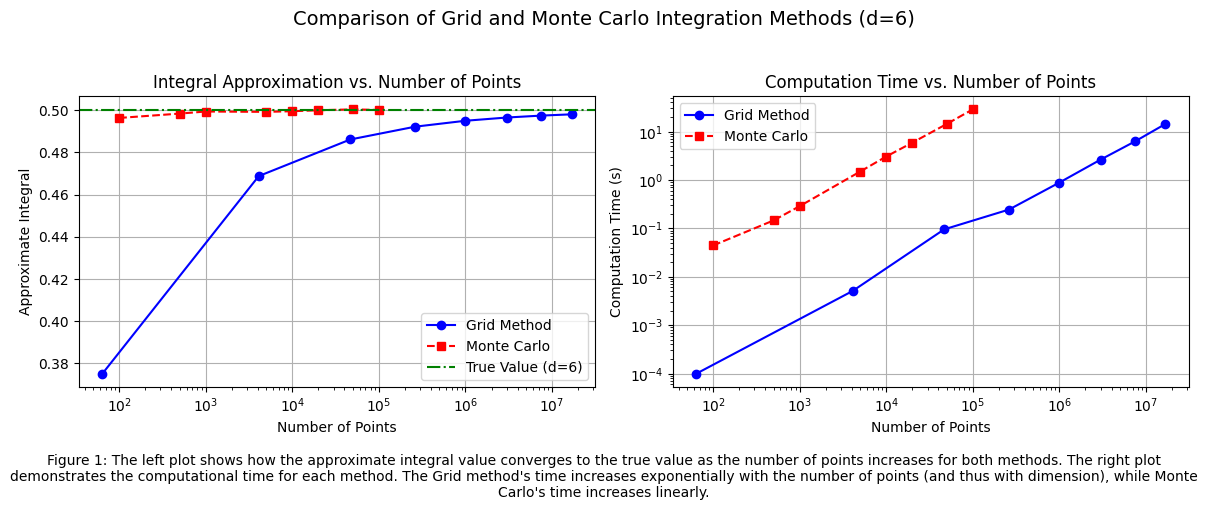

In [10]:
# ==================== Plotting ====================
plt.figure(figsize=(12, 5))

# Plot 1: Integral Approximation vs. Number of Points
plt.subplot(1, 2, 1)
plt.plot(grid_results["n"], grid_results["integral"], marker='o', color='b', linestyle='-', label="Grid Method")
plt.plot(mc_results["n"], mc_results["integral"], marker='s', color='r', linestyle='--', label="Monte Carlo")
plt.axhline(y=d/12, color='g', linestyle='-.', label=f"True Value (d={d})")
plt.xlabel("Number of Points")
plt.ylabel("Approximate Integral")
plt.title("Integral Approximation vs. Number of Points")
plt.legend()
plt.grid(True)
plt.xscale("log")

# Plot 2: Computation Time vs. Number of Points
plt.subplot(1, 2, 2)
plt.plot(grid_results["n"], grid_results["time"], marker='o', color='b', linestyle='-', label="Grid Method")
plt.plot(mc_results["n"], mc_results["time"], marker='s', color='r', linestyle='--', label="Monte Carlo")
plt.xlabel("Number of Points")
plt.ylabel("Computation Time (s)")
plt.title("Computation Time vs. Number of Points")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

plt.suptitle(f"Comparison of Grid and Monte Carlo Integration Methods (d={d})", fontsize=14)
plt.figtext(0.5, 0.01, "Figure 1: The left plot shows how the approximate integral value converges to the true value as the number of points increases for both methods."
            " The right plot demonstrates the computational time for each method. The Grid method's time increases exponentially with the number of points (and thus with dimension), while Monte Carlo's time increases linearly.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

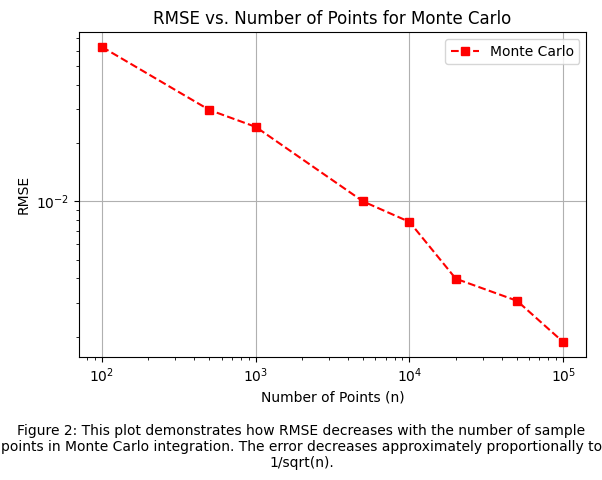

In [11]:
# Plot 3: Error vs. number of points for Monte Carlo
plt.figure(figsize=(6, 5))
plt.plot(mc_results["n"], mc_results["rmse"], marker='s', color='r', linestyle='--', label="Monte Carlo")
plt.xlabel("Number of Points (n)")
plt.ylabel("RMSE")
plt.title("RMSE vs. Number of Points for Monte Carlo")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.figtext(0.5, 0.01, "Figure 2: This plot demonstrates how RMSE decreases with the number of sample points in Monte Carlo integration."
            " The error decreases approximately proportionally to 1/sqrt(n).",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

In [17]:
n_values = [100, 500, 1000, 5000, 10000]
d_values = [2, 5, 10]
num_trials = 1000

# Store results for plotting
results = {}
for d in d_values:
    true_integral_value = d / 12 # True integral value for the test function
    results[d] = {"n": [], "rmse": []}
    for n in n_values:
        integral, rmse, _ = monte_carlo_integration(g, a, b, d, n, num_trials, true_integral_value)
        results[d]["n"].append(n)
        results[d]["rmse"].append(rmse)
        print(f"d={d}, n={n}, Integral={integral}, RMSE={rmse}")


d=2, n=100, Integral=0.16559578792874166, RMSE=0.01897888761602291
d=2, n=500, Integral=0.16639676487058178, RMSE=0.009029855458345561
d=2, n=1000, Integral=0.16677942191642126, RMSE=0.006325031004475695
d=2, n=5000, Integral=0.16666981693823163, RMSE=0.0028368179510455363
d=2, n=10000, Integral=0.16665625347319338, RMSE=0.0020131382183538877
d=5, n=100, Integral=0.4196788969970927, RMSE=0.05626310362495736
d=5, n=500, Integral=0.4166709516522623, RMSE=0.024765047961777645
d=5, n=1000, Integral=0.4170278455507437, RMSE=0.017461742755677405
d=5, n=5000, Integral=0.4165652022090085, RMSE=0.007591129801496271
d=5, n=10000, Integral=0.41675985434972646, RMSE=0.005441682989241025
d=10, n=100, Integral=0.8358400587737984, RMSE=0.11879220441806523
d=10, n=500, Integral=0.8363172292332981, RMSE=0.048245628616422294
d=10, n=1000, Integral=0.8337218673919786, RMSE=0.03643525358264244
d=10, n=5000, Integral=0.8327364340571056, RMSE=0.01630418034184553
d=10, n=10000, Integral=0.8334588329907378, R

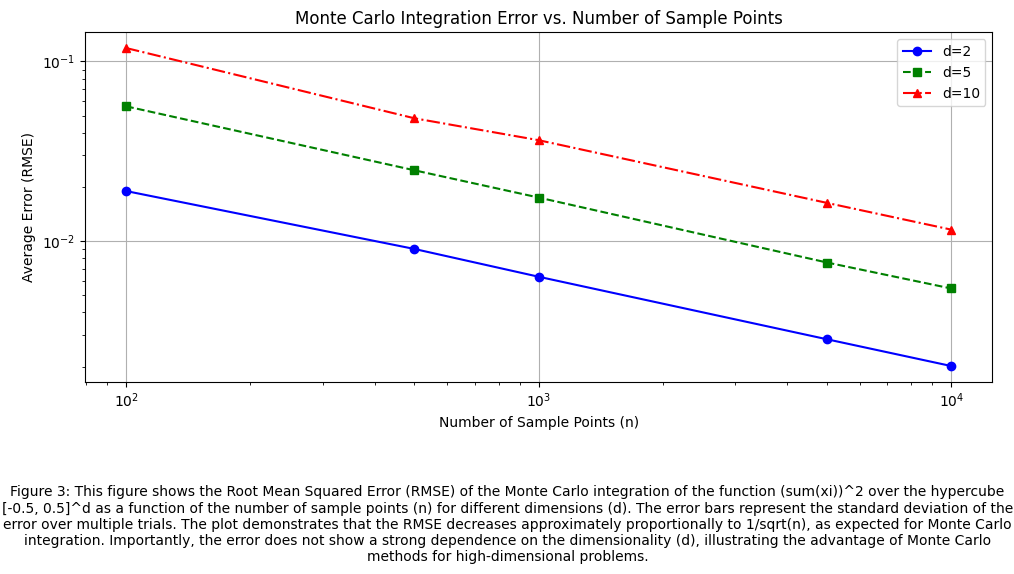

In [18]:
# Plotting
plt.figure(figsize=(10, 6))

markers = ['o', 's', '^']
colors = ['b', 'g', 'r']
linestyles = ['-', '--', '-.']

for i, d in enumerate(d_values):
    plt.plot(results[d]["n"], results[d]["rmse"],
             marker=markers[i], color=colors[i], linestyle=linestyles[i],
             label=f"d={d}")

plt.xlabel("Number of Sample Points (n)")
plt.ylabel("Average Error (RMSE)")
plt.title("Monte Carlo Integration Error vs. Number of Sample Points")
plt.legend()
plt.grid(True)
plt.xscale("log")  # Use log scale for x-axis
plt.yscale("log") # Use log scale for y-axis
plt.figtext(0.5, 0.01, "Figure 3: This figure shows the Root Mean Squared Error (RMSE) of the Monte Carlo integration of the function (sum(xi))^2 "
            "over the hypercube [-0.5, 0.5]^d as a function of the number of sample points (n) for different dimensions (d). "
            "The error bars represent the standard deviation of the error over multiple trials. "
            "The plot demonstrates that the RMSE decreases approximately proportionally to 1/sqrt(n), as expected for Monte Carlo integration. "
            "Importantly, the error does not show a strong dependence on the dimensionality (d), illustrating the advantage of Monte Carlo methods for high-dimensional problems.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.show()

# With another function

In [36]:
def g_new(x):
    """
    The new test function: sum(xi^3 + 2*xi)
    """
    return sum(xi**3 + 2*xi for xi in x)

In [37]:
# ==================== Parameters and Setup ====================
a = 0 # Lower limit of integration
b = 1 # Upper limit of integration
d = 6
n_values_mc = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]
num_trials = 100

# Calculate true integral value
true_integral_value = d * (((b**4) / 4 + b**2) - ((a**4) / 4 + a**2))


In [38]:
# ==================== Monte Carlo Method Execution and Results ====================
mc_results = {"n": [], "integral": [], "rmse": [], "time": []}
for n in n_values_mc:
    integral, rmse, time_taken = monte_carlo_integration(g_new, a, b, d, n, num_trials)
    mc_results["n"].append(n)
    mc_results["integral"].append(integral)
    mc_results["rmse"].append(rmse)
    mc_results["time"].append(time_taken)
    print(f"Monte Carlo (d={d}, n={n}): Integral={integral}, RMSE={rmse:.4f}, Time={time_taken:.4f}s")


Monte Carlo (d=6, n=100): Integral=7.487647537258372, RMSE=0.0240, Time=0.0678s
Monte Carlo (d=6, n=500): Integral=7.49506607163409, RMSE=0.0087, Time=0.2736s
Monte Carlo (d=6, n=1000): Integral=7.496778314659521, RMSE=0.0057, Time=0.5811s
Monte Carlo (d=6, n=5000): Integral=7.494006603676571, RMSE=0.0028, Time=2.3645s
Monte Carlo (d=6, n=10000): Integral=7.502150431475403, RMSE=0.0020, Time=5.1296s
Monte Carlo (d=6, n=20000): Integral=7.501326959635605, RMSE=0.0014, Time=9.8797s
Monte Carlo (d=6, n=50000): Integral=7.501742152901803, RMSE=0.0009, Time=24.1626s
Monte Carlo (d=6, n=100000): Integral=7.499455741919262, RMSE=0.0006, Time=46.1624s


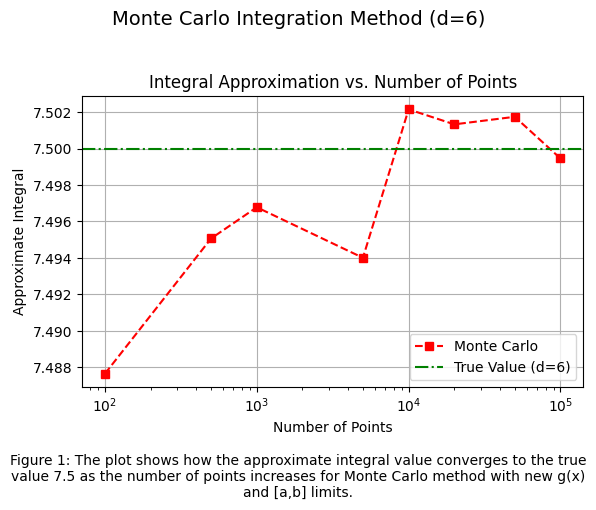

In [39]:
# ==================== Plotting ====================
# Plot 1: Integral Approximation vs. Number of Points
plt.figure(figsize=(6, 5))
plt.plot(mc_results["n"], mc_results["integral"], marker='s', color='r', linestyle='--', label="Monte Carlo")
plt.axhline(y=true_integral_value, color='g', linestyle='-.', label=f"True Value (d={d})")
plt.xlabel("Number of Points")
plt.ylabel("Approximate Integral")
plt.title("Integral Approximation vs. Number of Points")
plt.legend()
plt.grid(True)
plt.xscale("log")

plt.suptitle(f"Monte Carlo Integration Method (d={d})", fontsize=14)
plt.figtext(0.5, 0.01, f"Figure 1: The plot shows how the approximate integral value converges to the true value {true_integral_value} as the number of points increases for Monte Carlo method with new g(x) and [a,b] limits.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

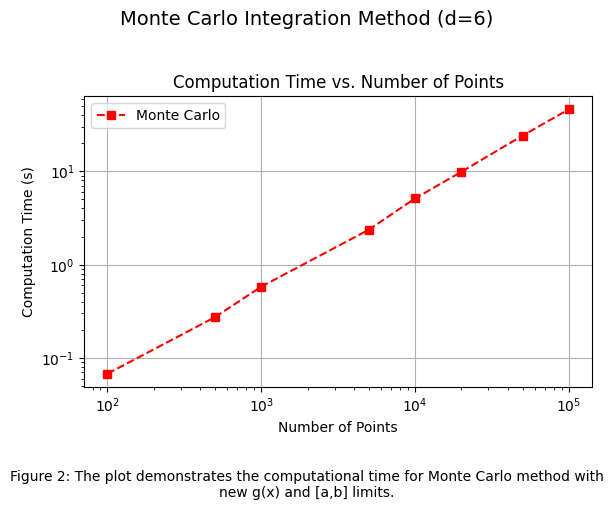

In [40]:
# Plot 2: Computation Time vs. Number of Points
plt.figure(figsize=(6, 5))
plt.plot(mc_results["n"], mc_results["time"], marker='s', color='r', linestyle='--', label="Monte Carlo")
plt.xlabel("Number of Points")
plt.ylabel("Computation Time (s)")
plt.title("Computation Time vs. Number of Points")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

plt.suptitle(f"Monte Carlo Integration Method (d={d})", fontsize=14)
plt.figtext(0.5, 0.01, f"Figure 2: The plot demonstrates the computational time for Monte Carlo method with new g(x) and [a,b] limits.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

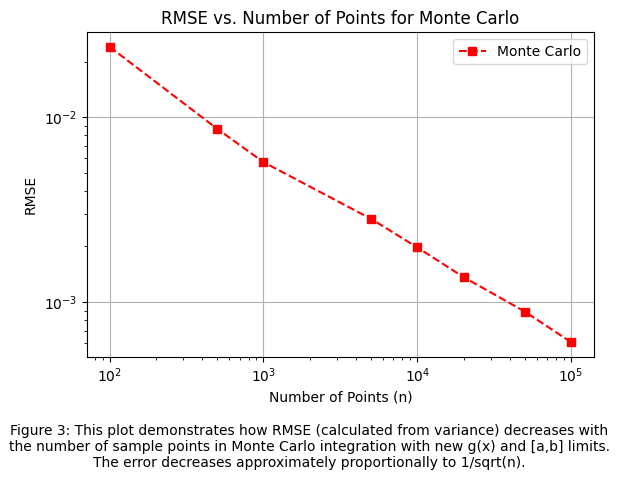

In [41]:
# Plot 3: Error vs. number of points for Monte Carlo
plt.figure(figsize=(6, 5))
plt.plot(mc_results["n"], mc_results["rmse"], marker='s', color='r', linestyle='--', label="Monte Carlo")
plt.xlabel("Number of Points (n)")
plt.ylabel("RMSE")
plt.title("RMSE vs. Number of Points for Monte Carlo")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.figtext(0.5, 0.01, f"Figure 3: This plot demonstrates how RMSE (calculated from variance) decreases with the number of sample points in Monte Carlo integration with new g(x) and [a,b] limits."
            " The error decreases approximately proportionally to 1/sqrt(n).",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

In [44]:
# ==================== Experiment with different dimensions ====================
n_values = [100, 500, 1000, 5000, 10000]
d_values = [2, 5, 10]
num_trials = 100

# Store results for plotting
results = {}
for d in d_values:
    results[d] = {"n": [], "rmse": []}
    for n in n_values:
        # true_integral_value = d * (((b**4) / 4 + b**2) - ((a**4) / 4 + a**2))
        integral, rmse, _ = monte_carlo_integration(g_new, a, b, d, n, num_trials)
        results[d]["n"].append(n)
        results[d]["rmse"].append(rmse)
        print(f"d={d}, n={n}, Integral={integral}, RMSE={rmse}")

d=2, n=100, Integral=2.5026777009778356, RMSE=0.010120176813355553
d=2, n=500, Integral=2.497615279102669, RMSE=0.006132967042910254
d=2, n=1000, Integral=2.5007036251748627, RMSE=0.003419366798240549
d=2, n=5000, Integral=2.4996016814828224, RMSE=0.001729444795806274
d=2, n=10000, Integral=2.500719955757661, RMSE=0.0011525368748491979
d=5, n=100, Integral=6.291235332266788, RMSE=0.01992228394244567
d=5, n=500, Integral=6.252460046995306, RMSE=0.007707527160990754
d=5, n=1000, Integral=6.242172348582952, RMSE=0.00500879075271407
d=5, n=5000, Integral=6.252093560604772, RMSE=0.0027696447652441085
d=5, n=10000, Integral=6.25112413581529, RMSE=0.0016159012550023518
d=10, n=100, Integral=12.473629462563272, RMSE=0.025146176840013853
d=10, n=500, Integral=12.490239660024724, RMSE=0.010640914079754796
d=10, n=1000, Integral=12.50283166159076, RMSE=0.007529376875679599
d=10, n=5000, Integral=12.501764949517444, RMSE=0.003946019196711785
d=10, n=10000, Integral=12.502560834987607, RMSE=0.00230

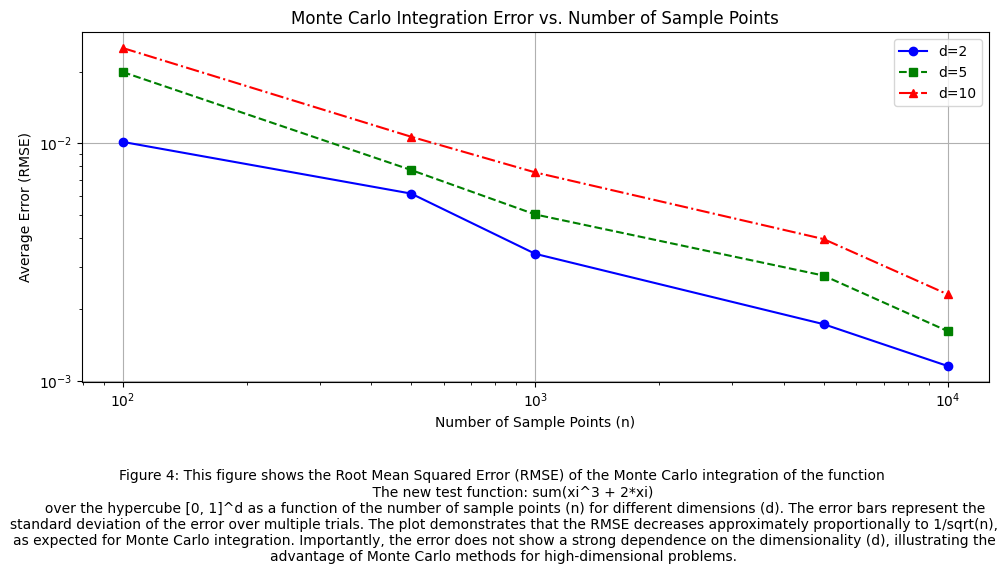

In [45]:
# Plotting
plt.figure(figsize=(10, 6))

markers = ['o', 's', '^']
colors = ['b', 'g', 'r']
linestyles = ['-', '--', '-.']

for i, d in enumerate(d_values):
    plt.plot(results[d]["n"], results[d]["rmse"],
             marker=markers[i], color=colors[i], linestyle=linestyles[i],
             label=f"d={d}")

plt.xlabel("Number of Sample Points (n)")
plt.ylabel("Average Error (RMSE)")
plt.title("Monte Carlo Integration Error vs. Number of Sample Points")
plt.legend()
plt.grid(True)
plt.xscale("log")  # Use log scale for x-axis
plt.yscale("log") # Use log scale for y-axis
plt.figtext(0.5, 0.01, f"Figure 4: This figure shows the Root Mean Squared Error (RMSE) of the Monte Carlo integration of the function {g_new.__doc__} "
            f"over the hypercube [{a}, {b}]^d as a function of the number of sample points (n) for different dimensions (d). "
            "The error bars represent the standard deviation of the error over multiple trials. "
            "The plot demonstrates that the RMSE decreases approximately proportionally to 1/sqrt(n), as expected for Monte Carlo integration. "
            "Importantly, the error does not show a strong dependence on the dimensionality (d), illustrating the advantage of Monte Carlo methods for high-dimensional problems.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.tight_layout(rect=[0, 0.2, 1, 0.95])
plt.show()